# Week 5 handin


## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 02 Status
Alt er lavet!

## 03 Solution part 1

In [2]:
import random
import csv
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:

url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1B,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, statsborgerskab, tid]"
2,FOLK1C,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, herkomst, oprindelsesland..."
3,FOLK1D,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, statsborgerskab, tid]"
4,FOLK1E,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, herkomst, tid]"
5,FOLK2,Folketal 1. januar,antal,2021-02-11T08:00:00,1980,2021,True,"[alder, køn, herkomst, statsborgerskab, oprind..."
6,KRYDS1,Folketal 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons herkomst, Hovedpersons fødeland,..."
7,KRYDS2,Personer med dansk oprindelse 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons fødeland, forældres fødeland og ..."
8,KRYDS3,Folketal 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons herkomst, Hovedpersons fødeland,..."
9,KRYDS4,Folketal 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons herkomst, forældres fødeland og ..."


In [12]:
#5.A
expenditure_csv = 'data/FOLK1A (4).csv'

expenditures = pd.read_csv(expenditure_csv, sep=';')
k2008 = expenditures.iloc[0][2]
print(k2008)
expenditures
k2020 = expenditures.iloc[-2][2]
print(k2020)
print(round((k2020/k2008-1)*100,2))

428864
552419
28.81


In [47]:
#5.B
csv_data_1 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&OMR%C3%85DE=*", sep=";")
biggest_cities = csv_data_1[~csv_data_1.OMRÅDE.str.contains('|'.join(["Region", "Hele"]))].nlargest(5, 'INDHOLD')
biggest_cities_cut = biggest_cities[['OMRÅDE', 'INDHOLD']]

csv_data_2 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=U&Tid=2020K4", sep=";")
top_5_divorced_cities = csv_data_2[csv_data_2['OMRÅDE'].isin(biggest_cities_cut['OMRÅDE'])]
top_5_divorced_cities_cut = top_5_divorced_cities[['OMRÅDE','INDHOLD']].reindex(biggest_cities_cut.index)

final_product = pd.DataFrame(columns=("OMRÅDE", "PROCENT"))
for x in range(5):
    procent = (top_5_divorced_cities_cut.iloc[x][1]/biggest_cities_cut.iloc[x][1])*100
    final_product.loc[x] = ([biggest_cities_cut.iloc[x][0], procent])
final_product_sorted = final_product.sort_values(by=['PROCENT'], ascending=False)

print(final_product_sorted)

      OMRÅDE    PROCENT
0  København  65.471066
1     Aarhus  60.060212
3     Odense  55.296362
2    Aalborg  54.775909
4      Vejle  47.110914


       TID     OMRÅDE      CIVILSTAND  INDHOLD
0   2008K1  København           Ugift   309661
1   2008K1  København  Gift/separeret   128556
2   2008K1  København   Enke/enkemand    21555
3   2008K1  København        Fraskilt    50089
4   2009K1  København           Ugift   317126
5   2009K1  København  Gift/separeret   130995
6   2009K1  København   Enke/enkemand    20600
7   2009K1  København        Fraskilt    49853
8   2010K1  København           Ugift   325562
9   2010K1  København  Gift/separeret   133196
10  2010K1  København   Enke/enkemand    19761
11  2010K1  København        Fraskilt    49689
12  2011K1  København           Ugift   335339
13  2011K1  København  Gift/separeret   135422
14  2011K1  København   Enke/enkemand    18963
15  2011K1  København        Fraskilt    49818
16  2012K1  København           Ugift   343978
17  2012K1  København  Gift/separeret   136827
18  2012K1  København   Enke/enkemand    18201
19  2012K1  København        Fraskilt    50044
20  2013K1  K

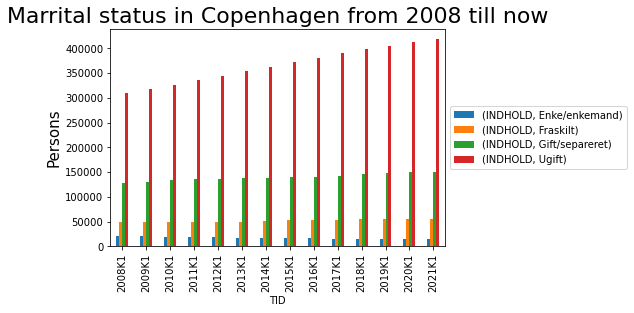

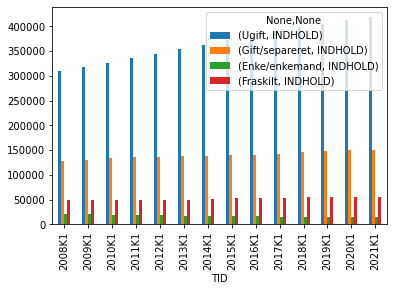

In [8]:
#5.C Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
csv_data_3 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&OMR%C3%85DE=101&CIVILSTAND=U%2CG%2CE%2CF", sep=";")

#Løsning 1
df = csv_data_3.groupby([ 'TID','CIVILSTAND']).mean().unstack()
print(csv_data_3)
print(df)
ax = df.plot(kind='bar')
ax.set_title("Marrital status in Copenhagen from 2008 till now", fontsize=22)
ax.set_ylabel("Persons", fontsize=15);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#Løsning 2
ugift = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Ugift"])].reset_index(drop=True)
gift_separeret = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Gift/separeret"])].reset_index(drop=True)
enke_enkemand = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Enke/enkemand"])].reset_index(drop=True)
fraskilt = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Fraskilt"])].reset_index(drop=True)
tid = ugift.loc[:]['TID']

data = pd.concat([ugift, gift_separeret,enke_enkemand,fraskilt], axis=1,keys=[ "Ugift", "Gift/separeret", "Enke/enkemand", "Fraskilt"])
data.index=tid
 
data.plot.bar()


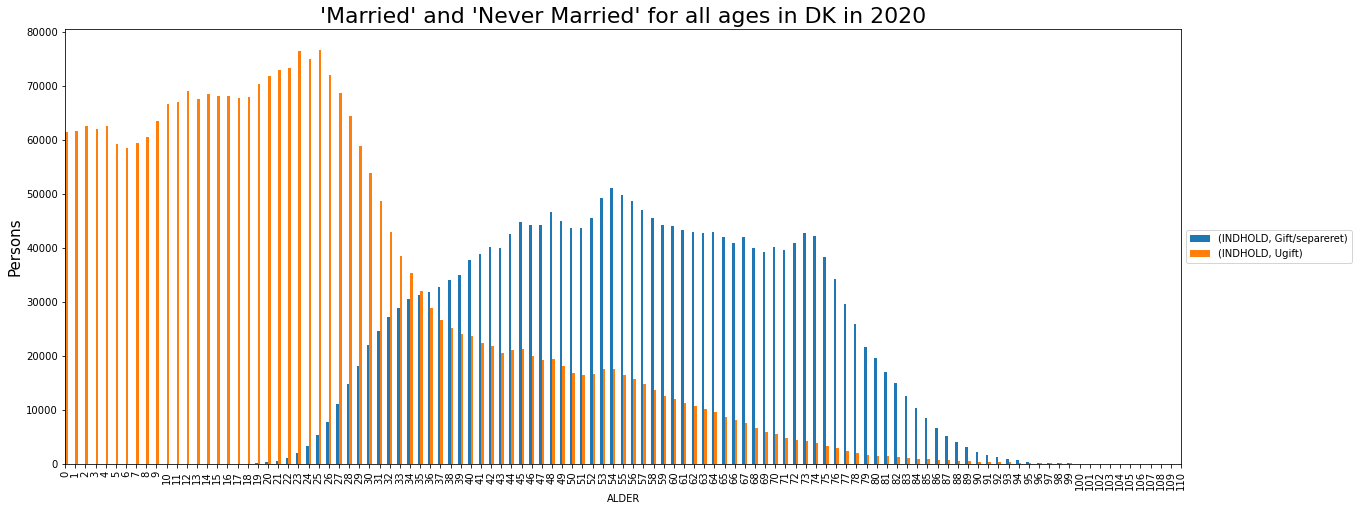

In [89]:
#5.D Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories).
#Add lengend to show names on graphs

d_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K4&ALDER=*', sep=';')

#Løsning 1
new_data = d_data[d_data[:]['ALDER'] != 'I alt']

new_data.loc[:,'ALDER'] = [x.replace(' år', '') for x in new_data['ALDER']]
new_data.loc[:,'ALDER'] = pd.to_numeric(new_data['ALDER'], errors='coerce')

df = new_data.groupby([ 'ALDER', 'CIVILSTAND']).mean().sort_values(by='ALDER', ascending=False).unstack()

ax = df.plot(kind='bar', figsize=(20,8))
plt.xlim(0,110)
ax.set_title("'Married' and 'Never Married' for all ages in DK in 2020", fontsize=22)
ax.set_ylabel("Persons", fontsize=15);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Løsning 2
 married_data = d_data[(d_data[:]['CIVILSTAND'].str.contains('Gift')) & (d_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
not_married_data = d_data[(d_data[:]['CIVILSTAND'].str.contains('Ugift')) & (d_data[:]['ALDER'] != 'I alt')]

 data = pd.concat([not_married_data, married_data], axis=1, keys=['Not Married','Married'])

 data.plot(kind="bar", figsize=(20,8))
 plt.xlim(0,110)

 plt.show()